# Постановка задачи

1. Использовать датасет Fashion-MNIST для обучения нейросети.
2. Сделать снимок какого-нибудь элемента одежды и предсказать его класс с помощью нейронной сети CNN.
3. Добавить аугментацию данных для увеличения датасета. Сравнить качество распознавания как на датасете, так и на собственных изображениях.

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential # импортируем пустую последовательную модель Sequential, на которую последовательно навешиваем слои 
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer, RandomZoom # импортируем слои Dense (полносвязный), Flatten (чтобы расплющить результаты, сделать их одномерным массивом; чтобы слои Dense смогли принять данные с свёрточных слоёв); слой Dropout позволяет избежать переобучения
from keras.datasets import fashion_mnist # импортируем из модуля keras.datasets класс fashion_mnist (база данных изображений одежды)
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

import requests
from PIL import Image
from io import BytesIO

%matplotlib inline

## Импортируем данные

In [117]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # x_train, x_test: массив данных изображений в градациях серого uint8 с формой (размерность 28х28). y_train, y_test: массив меток uint8 (целые числа в диапазоне от 0 до 9)

In [124]:
type(x_train)

numpy.ndarray

In [7]:
# выводим размерности данных
print(f'x_train.shape: {x_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


## Проверка данных

In [8]:
SAMPLE_NUMBER = 6 # выбираем значение от 0 до 60 000 по колиечтсву значений в нашем датасете

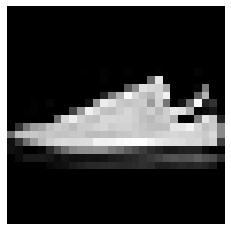

In [9]:
plt.imshow(x_train[SAMPLE_NUMBER], cmap='gray') # используем функцию imshow для отображения изображения
plt.axis('off')
plt.show()

In [10]:
print(f'Это изображение класса: {y_train[SAMPLE_NUMBER]}')

Это изображение класса: 7


In [11]:
fashion_mnist_classes = [ # задаём название для каждого значения класса
  'T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'
]

Изображение:


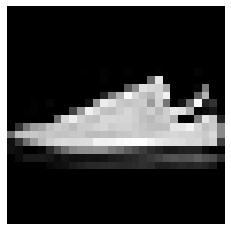

Это изображение класса: Sneaker


In [12]:
print(f'Изображение:')
plt.imshow(x_train[SAMPLE_NUMBER], cmap='gray')
plt.axis('off')
plt.show()
print(f'Это изображение класса: {fashion_mnist_classes[np.array(y_train[SAMPLE_NUMBER]).flatten()[0]]}')

## Предобработка данных

In [13]:
x_train[0] # отображаем массив данных, который хранится в значении "0"; из результатов видно, что значение каждого элемента (пикселя) находится в диапазоне от 0 до 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## Нормализация данных

In [14]:
x_train_norm = x_train.astype('float32') / 255 # приводим данные к вещественным числам и делим на 255, потому что нейросети удобнее работать со значениями от 0 до 1, а не от 0 до 255
x_test_norm = x_test.astype('float32') / 255

In [15]:
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
y_train_norm = np_utils.to_categorical(y_train, 10) # проводим one-hot кодирование для labels (y) для 10 классов (10 классов картинок в датасете), чтобы нейросеть предсказывала данные в правильном формате (на выходе у сети будет 10 нейронов)
y_test_norm = np_utils.to_categorical(y_test, 10)

In [17]:
y_train_norm[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [77]:
x_train_norm.shape

(60000, 28, 28)

In [78]:
x_train_norm.shape[1]

28

## Создание модели

In [231]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(x_train_norm.shape[1], x_train_norm.shape[2], 1))) # добавляем свёрточный слой Conv2D; количество фильтров - 32; kernel_size - размер фильтра - 3х3; добавляем нелинейную активацию (функцию) Relu, чтобы всю нейросеть нельзя было свернуть в один нейрон; в самый первый слой сети передаём параметр input_shape=(28, 28) - размерность данных, которые будут подаваться в нейросеть - берётся из x_train_norm.shape без первого показтеля (количество экземпляров)
model.add(MaxPooling2D(pool_size=2)) # добавляем слой Pooling с параметром pool_size - размер фильтров слоя Pooling
model.add(Dropout(0.25)) # слой Dropout служит для того, чтобы модель не переобучалась; его смысл в том, что каждую итерацию обучения он случайным образом выключает какие-то из нейронов; 0.25 - доля тех нейронов, которая будет на время выключаться из процесса обучения; это связано с тем, что если моедль окажется зависима от какого-то одного нейрона (переобучится на нём), то когда этот нейрон попадёт в те 25%, что мы задали, нейросети придётся обучать модель на других нейронах

model.add(Flatten()) # преобразовываем данные в одномерный массив (одномерный вектор) для того, чтобы можно было работать со слоем Dense
model.add(Dense(32, activation='relu')) # полносвязный слой Dense не может работать с двумерным массивом данных (ему нужен одномерный массив), поэтому приходится предобрабатывать данные с помощью слоя Flatten
model.add(Dense(10, activation='sigmoid')) # последний выходной слой (тоже полносвязный), однако в нём количество нейронов будет равно количеству классов датафрейма (10); softmax - специальная активация, при которой выходные числа преобразовываются в формат процентов (%)

In [232]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # скомпилируем модель - зададим правила, по которым модель будет обучаться 

In [233]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_12 (Dense)            (None, 32)                200736    
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                      

In [234]:
model.fit(x_train_norm, y_train_norm, epochs=10) # обучаем модель; функция ошибки (loss) должна уменьшаться, точность (accuracy) увеличиваться

Epoch 1/10
1875/1875 [==============================] - 47s 23ms/step - loss: 0.4354 - accuracy: 0.8461
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3130 - accuracy: 0.8863
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2783 - accuracy: 0.8999
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2559 - accuracy: 0.9074
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2350 - accuracy: 0.9138
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2204 - accuracy: 0.9184
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2062 - accuracy: 0.9237
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1963 - accuracy: 0.9267
Epoch 9/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1840 - accuracy: 0.9307
Epoch 10/10
1875/1875 [==============================] - 59s 31m

In [83]:
model.evaluate(x_test_norm, y_test_norm) # проверяем точность на тестовых данных

313/313 [==============================] - 3s 8ms/step - loss: 0.2548 - accuracy: 0.9156


[0.2547997236251831, 0.9156000018119812]

## Проверка работы модели

In [108]:
def resize_image(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  width, height = img.size
  square_side = min(width, height)
  img = img.crop((
    np.ceil((width - square_side) / 2),
    np.ceil((height - square_side) / 2),
    np.ceil((width + square_side) / 2),
    np.ceil((height + square_side) / 2)
  ))

  img.thumbnail((28, 28))
  np_array = -(np.array(img) - 256)
  np_array = np_array / 255

  #np_array = np_array.reshape(28, 28, 1)

  return np_array

In [109]:
np.expand_dims(x_test_norm[8], axis=0).shape

(1, 28, 28)

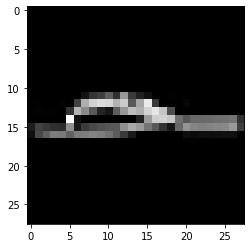

In [31]:
plt.imshow(x_test_norm[8], cmap='gray')

In [32]:
fashion_mnist_classes[np.argmax(model.predict(np.expand_dims(x_test_norm[8], axis=0)))]

1/1 [==============================] - 0s 100ms/step


'Sandal'

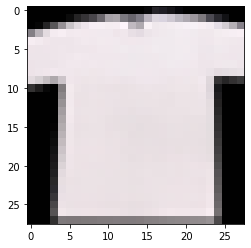

In [33]:
plt.imshow(resize_image('https://piterdm.ru/images/statyu/chernye_futbolki_dlya_sublimacii.jpg')) # загружаем фотографию
# https://piterdm.ru/images/statyu/chernye_futbolki_dlya_sublimacii.jpg
# https://i.imgur.com/BNzjEyH.jpg

In [34]:
#fashion_mnist_classes[np.argmax(model.predict(np.expand_dims(resize_image('https://piterdm.ru/images/statyu/chernye_futbolki_dlya_sublimacii.jpg'), axis=0)))]
fashion_mnist_classes(np.argmax(model.predict(np.array([resize_image('https://piterdm.ru/images/statyu/chernye_futbolki_dlya_sublimacii.jpg')]))))

UnimplementedError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "/Users/andrey/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/andrey/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/andrey/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/andrey/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/andrey/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/hy/pfmkjt294bl40vdb0nfc_y4c0000gn/T/ipykernel_37854/3174976288.py", line 2, in <cell line: 2>
      fashion_mnist_classes(np.argmax(model.predict(np.array([resize_image('https://piterdm.ru/images/statyu/chernye_futbolki_dlya_sublimacii.jpg')]))))
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2079, in predict_step
      return self(x, training=False)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/sequential.py", line 413, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 314, in call
      return self.activation(outputs)
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/Users/andrey/opt/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
Fused conv implementation does not support grouped convolutions for now.
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_77855]